In [1]:
import pandas as pd
import os
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import cv2

In [2]:
experiences = [
    'exp77', 'exp72', 'exp70'
]

In [3]:
predictions = pd.DataFrame()
final_path = 'ensemble'
for i, exp in enumerate(experiences):
    path = os.path.join('logs', exp, f'kaggle_prediction_{exp}.csv')
    df = pd.read_csv(path)
    predictions[exp] = df['class']
    final_path += f'_{exp}'


In [4]:
preds = predictions.mode(axis=1).to_numpy()[:, 0]

In [5]:
test_df = pd.DataFrame()
test_df['number'] = np.arange(len(preds))
test_df['class'] = preds.astype(int)

In [6]:
test_df.to_csv(f'{final_path}.csv', index=False)

## Ensemble test 

In [7]:
experiences = ['exp76', 'exp71', 'exp69']

In [8]:
predictions = pd.DataFrame()

In [9]:
for index, exp in enumerate(experiences):
    path = os.path.join('logs', exp, f'test_split_prediction_{exp}.csv')
    df = pd.read_csv(path)
    predictions[exp] = df['class']


In [10]:
y_real = df['real']

In [11]:
preds = predictions.mode(axis=1).to_numpy()[:, 0]

In [12]:
print(metrics.classification_report(y_real, preds))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       400
           1       0.95      0.98      0.97       400
           2       0.82      0.83      0.83       400
           3       0.86      0.80      0.83       400
           4       0.90      0.88      0.89       400
           5       0.92      0.89      0.90       400

    accuracy                           0.89      2400
   macro avg       0.89      0.89      0.88      2400
weighted avg       0.89      0.89      0.88      2400



Text(0.5, 1.0, 'Confusion matrix')

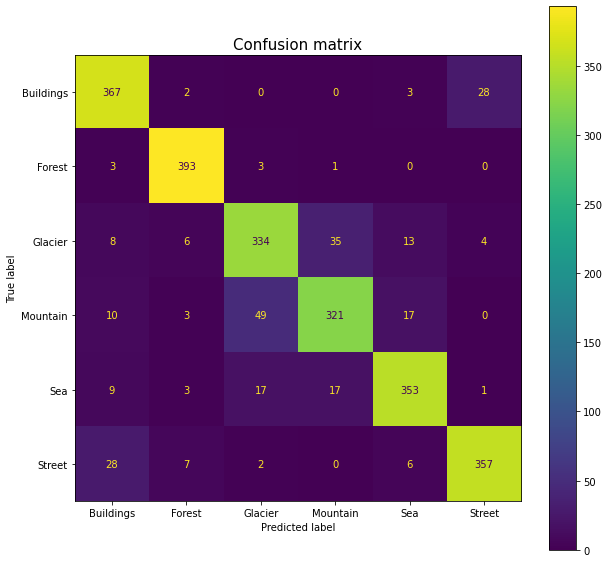

In [13]:
cm = metrics.confusion_matrix(y_real, preds)

# save confusion matrix as image
fig, ax = plt.subplots(figsize=(10, 10))
disp = metrics.ConfusionMatrixDisplay(cm, display_labels=['Buildings', 'Forest', 'Glacier', 'Mountain', 'Sea', 'Street'])
disp.plot(ax=ax)
plt.title('Confusion matrix', fontdict={'fontsize': 15})

# Ensemble k-Fold

In [36]:
experience = 'exp78'

In [37]:
predictions = pd.DataFrame()
for i in range(3):
    path = os.path.join('logs', experience, f'ensemble_train_{i}_prediction_{experience}.csv')
    df = pd.read_csv(path)
    predictions[i] = df['class']

In [38]:
y_real = df.real

In [39]:
preds = predictions.mode(axis=1).to_numpy()[:, 0]

In [40]:
print(metrics.classification_report(y_real, preds))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       400
           1       0.91      0.97      0.94       400
           2       0.83      0.81      0.82       400
           3       0.86      0.79      0.82       400
           4       0.84      0.89      0.86       400
           5       0.84      0.86      0.85       400

    accuracy                           0.86      2400
   macro avg       0.86      0.86      0.85      2400
weighted avg       0.86      0.86      0.85      2400

